<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/Codes/Supervisionado/DS%20-%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## **Dataset**

In [41]:
datasetKNear = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetKNear.drop(['Id'], axis=1, inplace=True)

datasetKNear.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetKNear.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


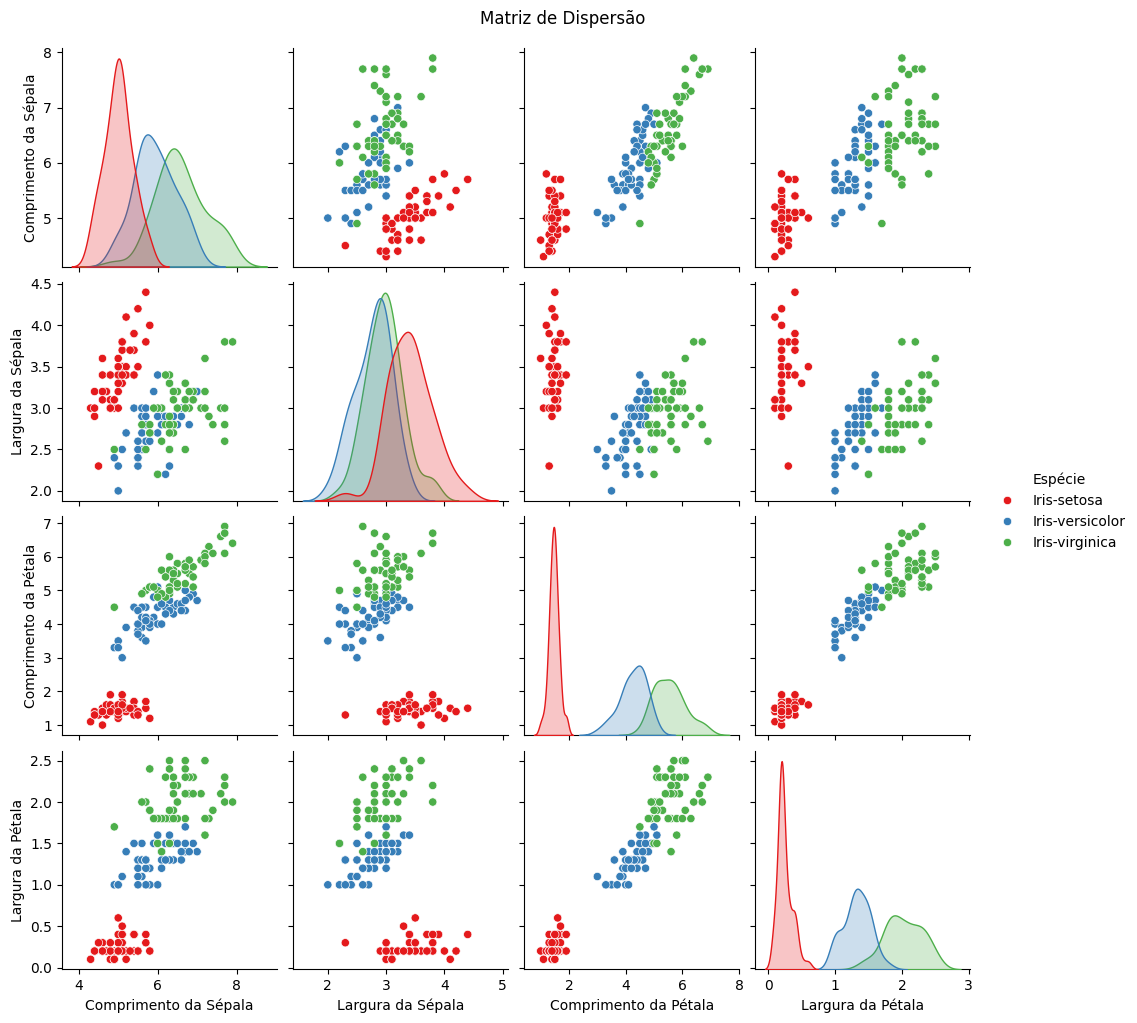

In [42]:
sns.pairplot(datasetKNear, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

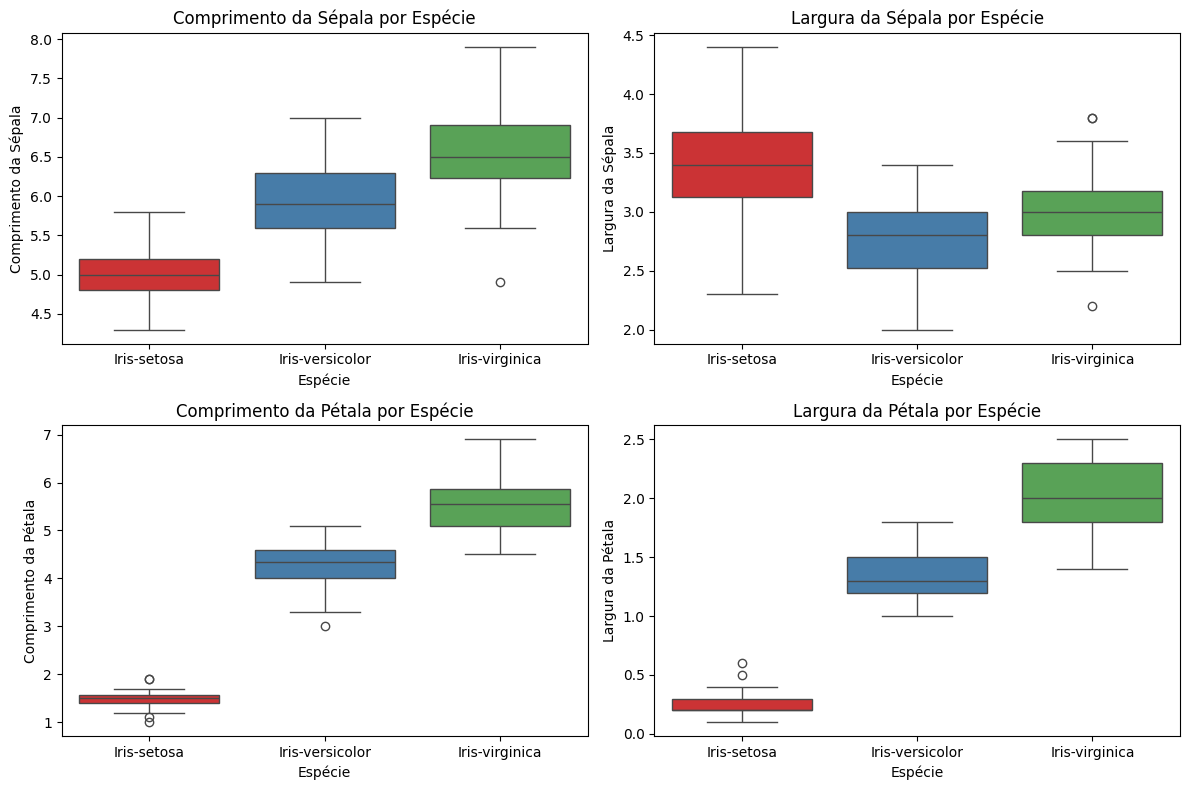

In [43]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetKNear.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetKNear, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

In [44]:
#FUNÇÃO PARA REMOVER OUTLIERS
def remover_outliers_por_categoria(dataset, coluna_valor, coluna_categoria):
    datasetArrumado = pd.DataFrame()

    for categoria in dataset[coluna_categoria].unique():
        grupo = dataset[dataset[coluna_categoria] == categoria]

        Q1 = grupo[coluna_valor].quantile(0.25)
        Q3 = grupo[coluna_valor].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        grupo_filtrado = grupo[(grupo[coluna_valor] >= limite_inferior) & (grupo[coluna_valor] <= limite_superior)]
        datasetArrumado = pd.concat([datasetArrumado, grupo_filtrado])

    return datasetArrumado

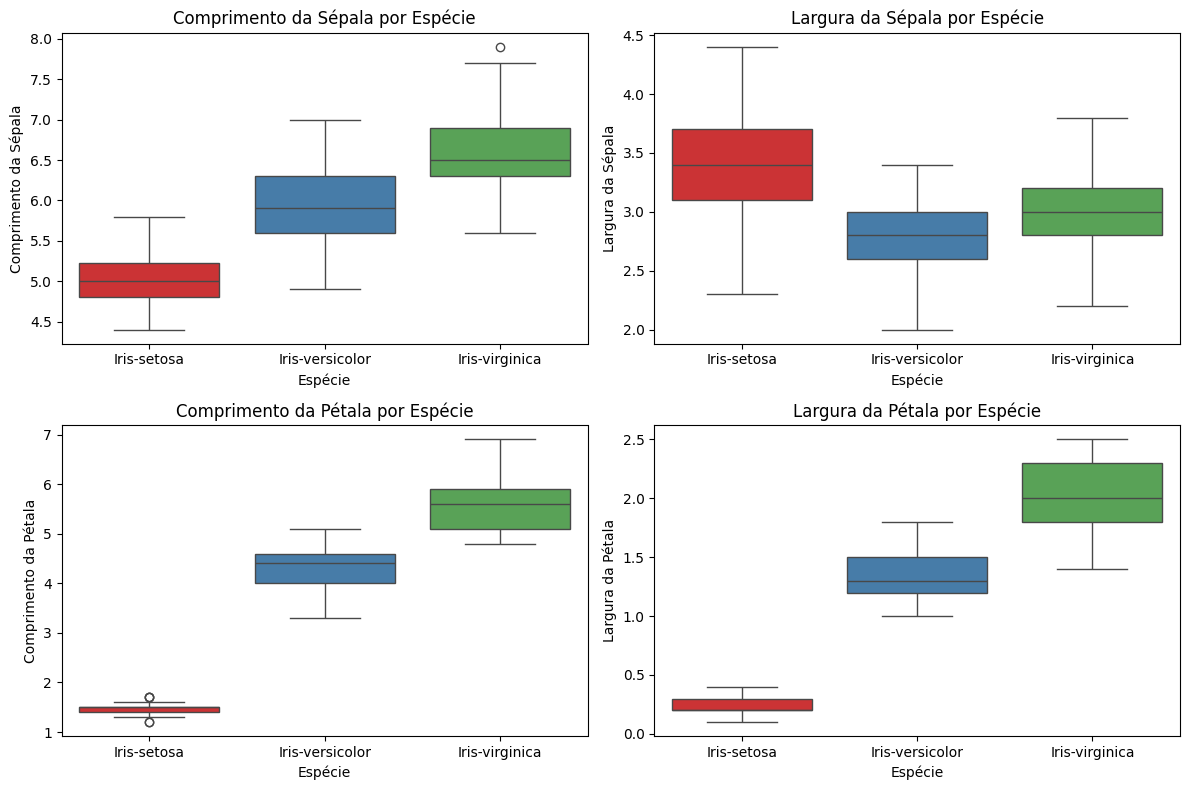

In [45]:
datasetKNearArrumado = datasetKNear.copy()

colunas = ['Comprimento da Sépala', 'Largura da Sépala',
           'Comprimento da Pétala', 'Largura da Pétala']

for coluna in colunas:
    datasetKNearArrumado = remover_outliers_por_categoria(datasetKNearArrumado, coluna, 'Espécie')

plt.figure(figsize=(12, 8))
for i, coluna in enumerate(datasetKNearArrumado.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetKNearArrumado, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')
plt.tight_layout()
plt.show()

## **Modelo**

In [46]:
#DEFINIR VARIÁVEIS
XKNear = datasetKNearArrumado.drop(["Espécie"], axis=1)
YKNear = datasetKNearArrumado["Espécie"]

#DIVISÃO EM TREINO E TESTE
XKNear_treino, XKNear_teste, YKNear_treino, YKNear_teste = train_test_split(XKNear, YKNear, test_size=0.2, random_state=42, stratify=YKNear)

#TREINO DO MODELO
modelKNear = KNeighborsClassifier(n_neighbors=3)
modelKNear.fit(XKNear_treino, YKNear_treino)

KNeighborsClassifier(n_neighbors=3)

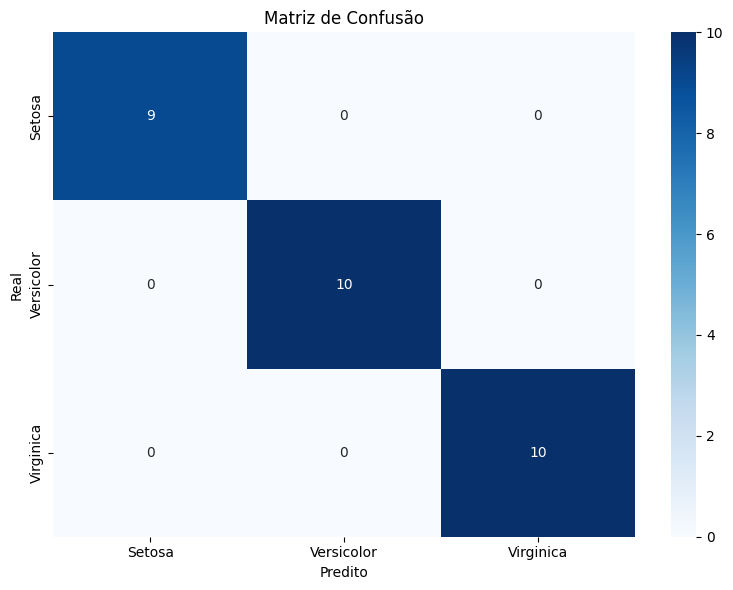

In [47]:
YKNear_pred = modelKNear.predict(XKNear_teste)

#MATRIZ DE CONFUSÃO
CM = confusion_matrix(YKNear_teste, YKNear_pred)
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

## **Extra**

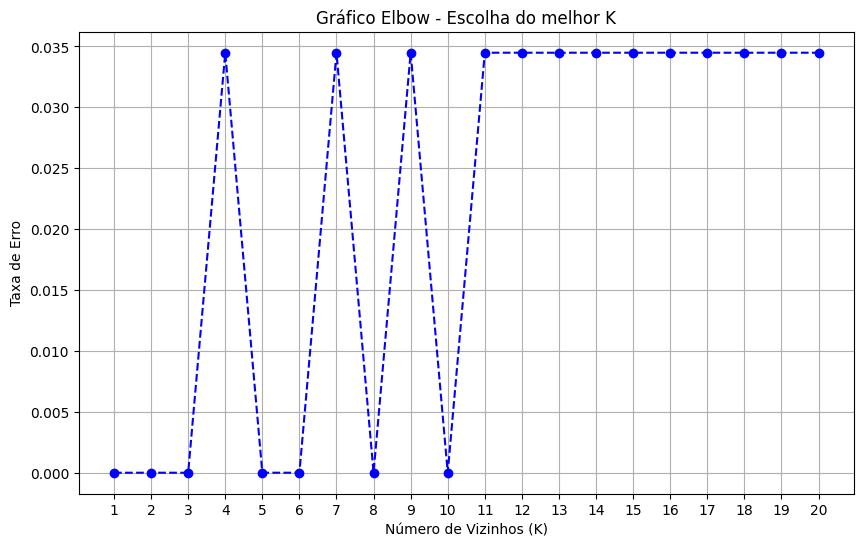

In [48]:
from sklearn.metrics import accuracy_score

erro = []

#TESTAR VALORES DE K DE 1 A 20
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(XKNear_treino, YKNear_treino)
    pred_k = model.predict(XKNear_teste)
    erro.append(1 - accuracy_score(YKNear_teste, pred_k))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), erro, marker='o', linestyle='--', color='b')
plt.title('Gráfico Elbow - Escolha do melhor K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Taxa de Erro')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

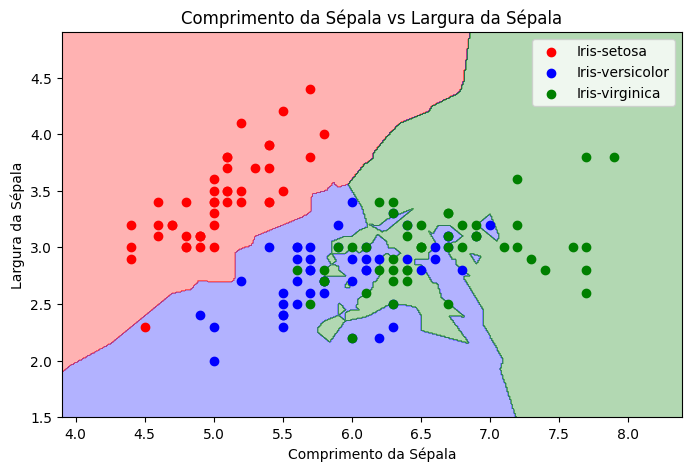

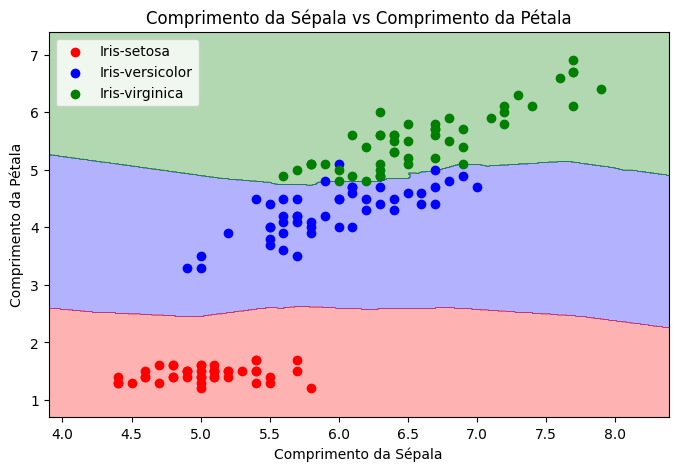

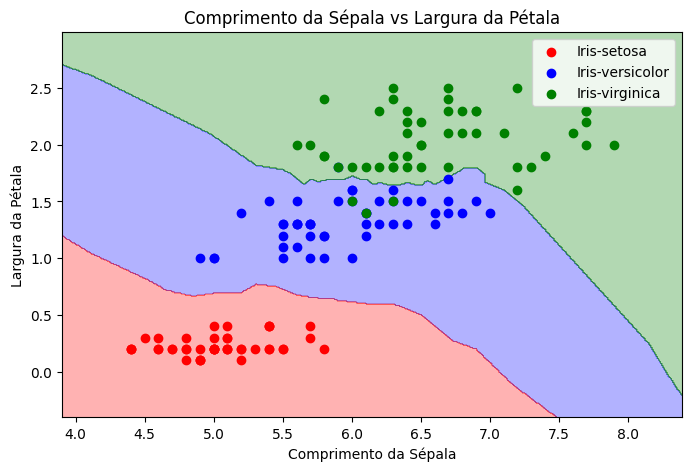

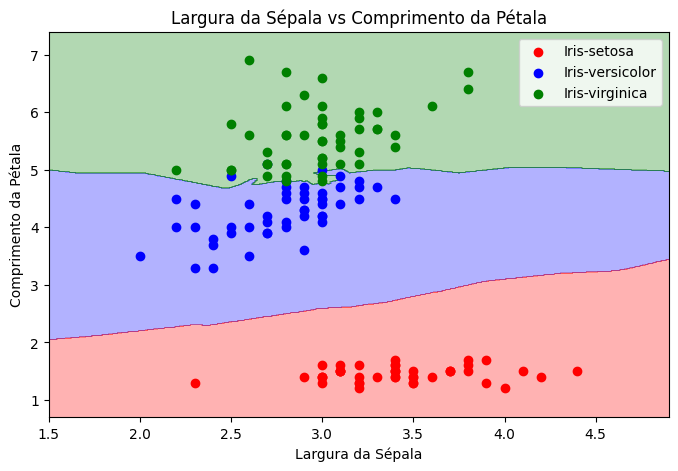

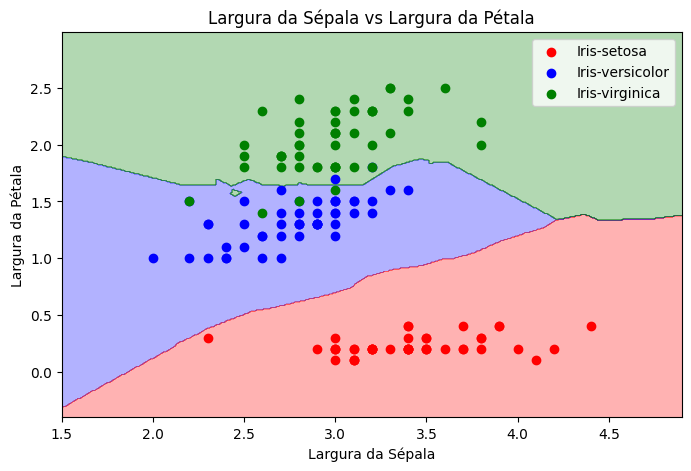

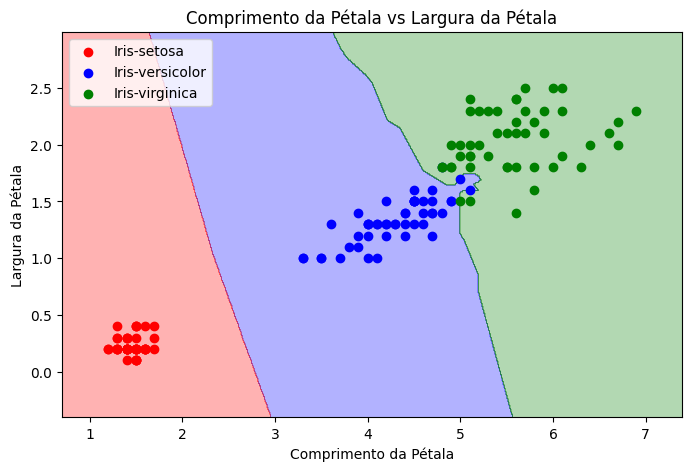

In [49]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import itertools

features = XKNear.columns.tolist()
YKNear = datasetKNearArrumado['Espécie'].values

LE = LabelEncoder()
YKNear_encoded = LE.fit_transform(YKNear)

#GERA AS COMBINAÇÕES COM 2 FEATURES
combinations = list(itertools.combinations(features, 2))

for combo in combinations:
    XKNear = datasetKNearArrumado[list(combo)].values

    modelKNear = KNeighborsClassifier(n_neighbors=3)
    modelKNear.fit(XKNear, YKNear_encoded)

    X1, X2 = np.meshgrid(
        np.arange(start=XKNear[:, 0].min() - 0.5, stop=XKNear[:, 0].max() + 0.5, step=0.01),
        np.arange(start=XKNear[:, 1].min() - 0.5, stop=XKNear[:, 1].max() + 0.5, step=0.01)
    )

    plt.figure(figsize=(8, 5))
    plt.contourf(
        X1, X2,
        modelKNear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.3,
        cmap=ListedColormap(('red', 'blue', 'green'))
    )

    for i, classe in enumerate(np.unique(YKNear_encoded)):
        plt.scatter(
            XKNear[YKNear_encoded == i, 0], XKNear[YKNear_encoded == i, 1],
            color=ListedColormap(('red', 'blue', 'green'))(i),
            label=LE.inverse_transform([i])[0]
        )

    plt.title(f'{combo[0]} vs {combo[1]}')
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.legend()
    plt.show()
